In [2]:
import torch
import torch.nn as nn

In [11]:
X = torch.tensor([[1.0], [2.0], [3.0], [4.0], [5.0], [6.0]])
y = torch.tensor([[0.0], [1.0], [0.0], [1.0], [0.0], [1.0]])
X, y

(tensor([[1.],
         [2.],
         [3.],
         [4.],
         [5.],
         [6.]]),
 tensor([[0.],
         [1.],
         [0.],
         [1.],
         [0.],
         [1.]]))

In [12]:
class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.liner = nn.Linear(1,1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.liner(x)
        x = self.sigmoid(x)
        return x

In [13]:
model = LogisticRegression()
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)


In [14]:
e, l = [], []
for epoch in range(1000):
    y_pred = model(X)
    loss = criterion(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        e.append(epoch + 1)
        l.append(loss.item())
        print(f'Epoch [{epoch + 1}/1000], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.6730
Epoch [200/1000], Loss: 0.6710
Epoch [300/1000], Loss: 0.6692
Epoch [400/1000], Loss: 0.6675
Epoch [500/1000], Loss: 0.6660
Epoch [600/1000], Loss: 0.6646
Epoch [700/1000], Loss: 0.6633
Epoch [800/1000], Loss: 0.6621
Epoch [900/1000], Loss: 0.6611
Epoch [1000/1000], Loss: 0.6601


<Axes: >

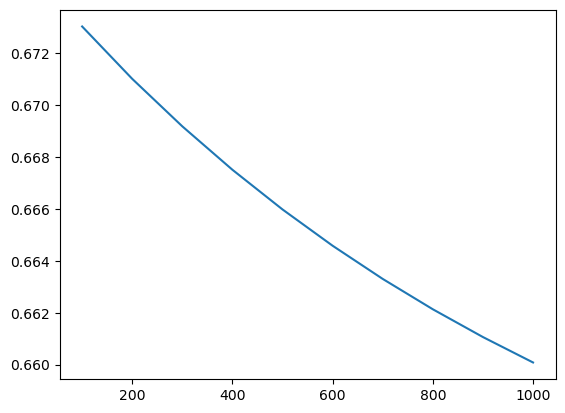

In [15]:
import seaborn as sns

sns.lineplot(x=e, y=l)


In [16]:
params = list(model.parameters())
print(f'Weight: {params[0].item():.4f}, Bias: {params[1].item():.4f}')

Weight: 0.1941, Bias: -0.5569
